<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer_csv = r"D:\Download\DataScience\Files\Week301023_Clustering\breast-cancer-wisconsin-data.csv"
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# From the above, will drop column 'id' and 'unnamed'. ID won't contribute anything to the ML model and Unnamed is simply column of null values
df.drop(columns = ['id', 'Unnamed: 32'], inplace=True)

In [7]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
# Looking at the head() and dtypes, all columns seems numerical and ready to go. Diagnosis, however is not numerical
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
# Changing B (benign) to 0 and M (malicious) to 1
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [10]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


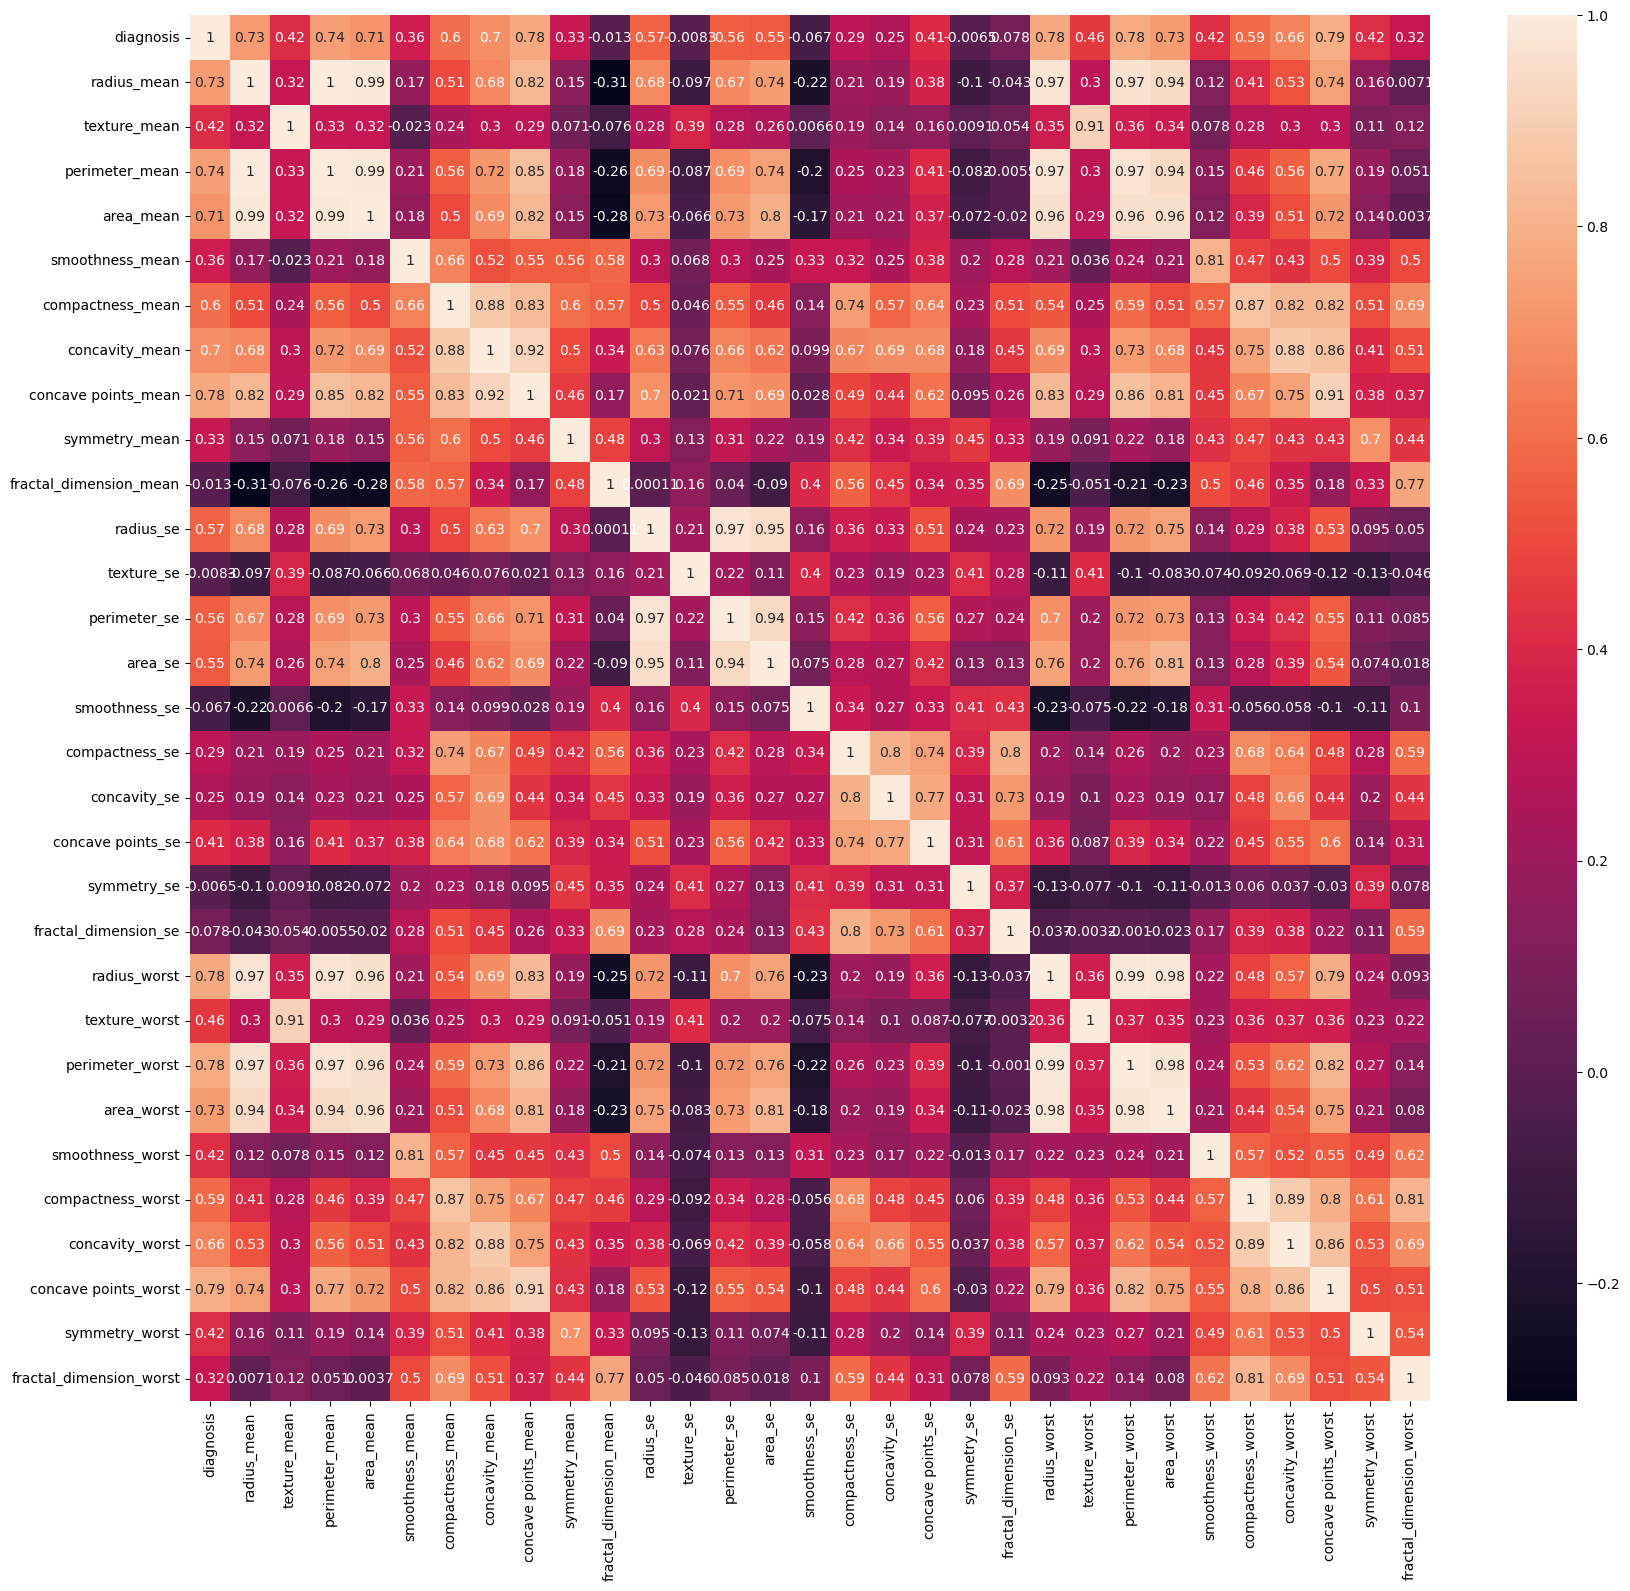

In [11]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True)
plt.show()

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [12]:
# ANSWER
# There are 2 classes, Malignant and Benign as mentioned above
# for setting up diagnosis variable as the target:
y = df['diagnosis']
X = df.drop('diagnosis', axis = 1)

In [13]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### 4. What is the baseline accuracy?

In [14]:
# ANSWER
# If baseline accuracy means the proportion of the most common class in your dataset:
baseline_accuracy = max(y.value_counts()) / len(y)
baseline_accuracy

# max of y.value_counts() is the most frequent value on that column. Which is 0 (benign)
# baseline accuracy of 0.6274 means if we were to always predict everything is benign, we would be 62.74% accurate predicting the dataset

0.6274165202108963

### 5. Choose features to be your predictor variables and set up your X.

In [15]:
# The method I'm choosing to be the predictor variables is the top 10 correlated feature with 'diagnosis'

# Get correlations with 'diagnosis'
correlations_with_diagnosis = df.corr()['diagnosis'].drop('diagnosis', errors='ignore')

# Sort them
sorted_correlations = correlations_with_diagnosis.abs().sort_values(ascending=False)

# Get the top 10
top_10_correlations = sorted_correlations.head(10)

print(top_10_correlations)
X = df[top_10_correlations.index]

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [16]:
# ANSWER
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [17]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred = knn.predict(X)
acc = accuracy_score(y, y_pred)
print(f"Standard Model Accuracy: {acc*100:.2f}%")

# From the result of 100% accuracy, it seems that it is definitely better than baseline accuracy
# Is it legitimate? It seems too good to be true to be 100% accurate. It's too soon to tell if this is legit or not.
# At least until train test split or cross validation

Standard Model Accuracy: 100.00%


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [18]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 92.11%


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [19]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
n_neighbors_num = X_train.shape[0]

# Fit Train Data
knn = KNeighborsClassifier(n_neighbors=n_neighbors_num)
knn.fit(X_train, y_train)

# Print accuracy_score
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 62.28%


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [20]:
# ANSWER
# plot test accuracy by number of neighbors:
accuracy_list = []

for i in range(1, n_neighbors_num):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    accuracy_list.append(test_acc)

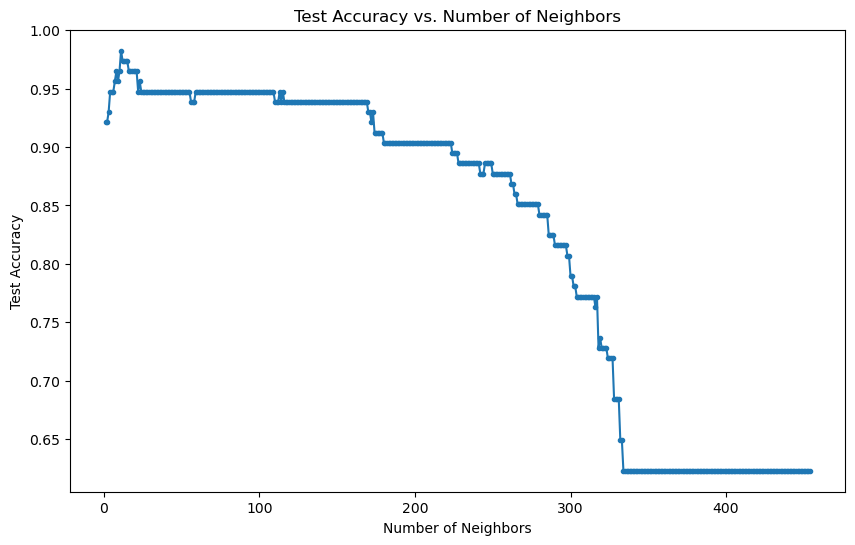

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1, n_neighbors_num), accuracy_list, marker='.', linestyle='-')
plt.title('Test Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


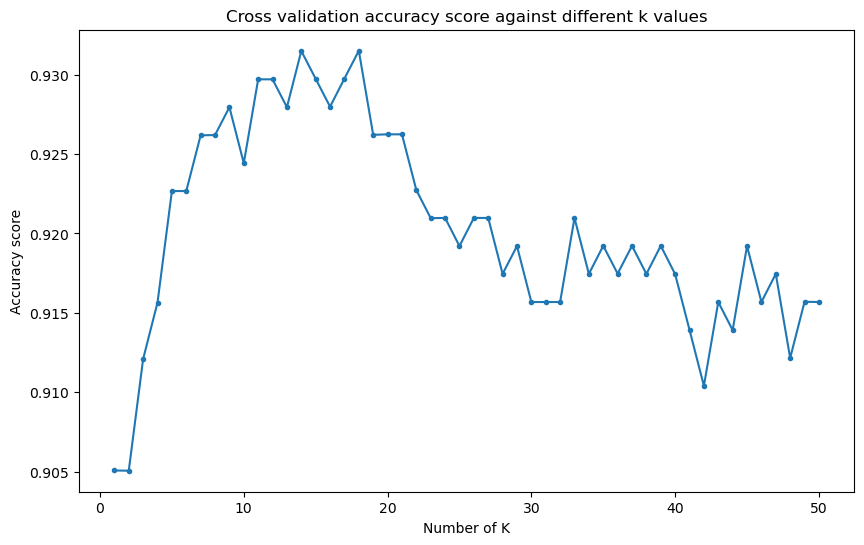

In [39]:
# ANSWER
# k = 1
# Five models - five fold - average accuracy - cv. SKlearn
# k = 2
# .
# .
# .
# k=n

from sklearn.model_selection import cross_val_score

k_max = 50
k_values = range(1, k_max+1)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 5)
    mean_scores.append(scores.mean())

plt.figure(figsize=(10,6))
plt.plot(k_values, mean_scores, marker='.', linestyle='-')
plt.title("Cross validation accuracy score against different k values")
plt.xlabel("Number of K")
plt.ylabel("Accuracy score")
plt.show()

In [55]:
print(f"The Max score for non standardized data: {max(mean_scores):.2f}%")
print(f"The Mean score for non standardized data: {(sum(mean_scores) / len(mean_scores)):.2f}%")

The Max score for non standardized data: 0.93%
The Mean score for non standardized data: 0.92%


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [49]:
# ANSWER
# Standarize X
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

k_max = 50
k_values = range(1, k_max+1)
mean_score_standardized = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv = 5)
    mean_score_standardized.append(scores.mean())

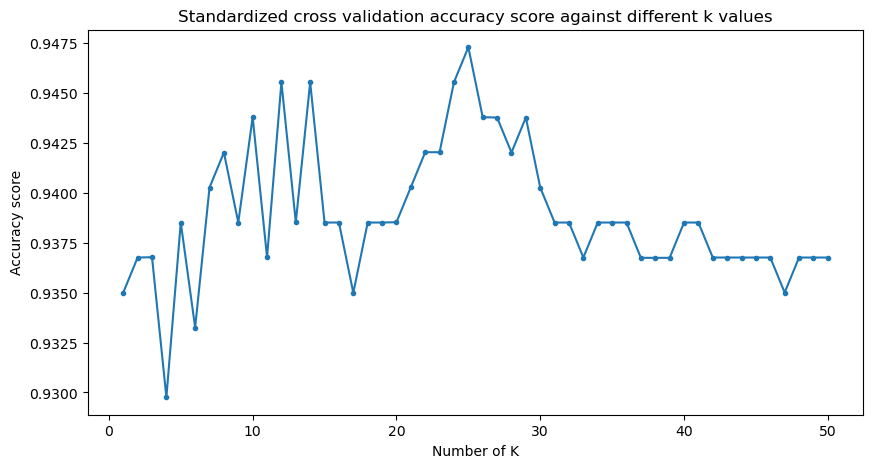

In [50]:
# ANSWER
# plot test accuracy by number of neighbors:
plt.figure(figsize=(10,5))
plt.plot(k_values, mean_score_standardized, marker = '.', linestyle = '-')
plt.title("Standardized cross validation accuracy score against different k values")
plt.xlabel("Number of K")
plt.ylabel("Accuracy score")
plt.show()

In [56]:
print(f"The Max score for non standardized data: {max(mean_score_standardized):.2f}%")
print(f"The Mean score for non standardized data: {(sum(mean_score_standardized) / len(mean_score_standardized)):.2f}%")

The Max score for non standardized data: 0.95%
The Mean score for non standardized data: 0.94%


In [ ]:
# As we can see from the graph and the accuracy comparison,standardized data is better
# This is because all features are scaled between 0 and 1,
# This means no feature will overpower other ones when it comes to fitting the model. 
# for KNN, this is important because it's distance-based
# If we have features like salary which ranges from hundreds to thousands,
# Then another feature is like age which is only between 0 to 100
# The euclidean distance on the big numbers and small numbers will have huge difference
# This could potentially distort the model and lead to weird results and less accuracy

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



